<a href="https://colab.research.google.com/github/KimJunGu9/3.data_analysis/blob/main/6_%EC%8A%A4%ED%81%AC%EB%A0%88%EC%9D%B4%ED%95%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 스크레이핑(Scraping)**

* 크롤링(Crawling) : 인터넷의 데이터를 활용하기 위해 정보들을 분석하고 활용할 수 있게 수집하는 행위
* 크롤링과 같은 개념이지만 데이터를 추출해서 가공하는 최종 목표

# **2. 크롤링**

### **2-1. basicenglishspeaking.com**

In [ ]:
import requests   # 서버에 접속해서 html 문서를 가져오는 역할(서버에 요청 -> 응답)
from bs4 import BeautifulSoup   # html 문서를 해석하는 역할(파싱)

In [ ]:
site = 'https://basicenglishspeaking.com/daily-english-conversation-topics/'
request = requests.get(site) 
print(request) # <Response [200]> 정상적인 접속
# print(request.text) # html 
html = request.text

<Response [200]>


In [ ]:
soup = BeautifulSoup(html)

In [ ]:
divs = soup.findAll('div', {'class' : 'thrv-columns'}) 
# 태그가 div면서, 속성은 class가 이름이 thrv-columns인 것을 찾아줘
# ctrl + f 해서 이름을 찾을때 1 of 1 일때 사용해도 된다. (유일한 것만 찾아야 하기 때문)

print(divs)

[<div class="thrv_wrapper thrv-columns" style="--tcb-col-el-width:792;"><div class="tcb-flex-row tcb--cols--3"><div class="tcb-flex-col"><div class="tcb-col"><div class="thrv_wrapper thrv_text_element"><p>1. <a class="tve-froala" href="https://basicenglishspeaking.com/family/" style="outline: none;">Family</a><br/>2. <a class="tve-froala" href="https://basicenglishspeaking.com/restaurant/" style="outline: none;">Restaurant</a><br/>3. <a href="https://basicenglishspeaking.com/books/">Books</a><br/>4. <a href="https://basicenglishspeaking.com/travel/">Travel</a><br/>5. <a href="https://basicenglishspeaking.com/website/">Website</a><br/>6. <a href="https://basicenglishspeaking.com/accident/">Accident</a><br/>7. <a class="tve-froala" href="https://basicenglishspeaking.com/childhood-memory/" style="outline: none;">Childhood memory</a><br/>8. <a class="tve-froala" href="https://basicenglishspeaking.com/favorite-rooms/" style="outline: none;">Favorite rooms</a><br/>9. <a href="https://basicen

In [ ]:
subject = []

for div in divs:
  links = div.findAll('a') # 'a' (앵커태그)를 찾아서 links에 저장
  # print(links)
  for link in links:
    # print(link.text)  # 앵커태그에 글자만 가져온다.
    subject.append(link.text) # subject의 리스트에다가 글자만 가져온 것을 담는다.

In [ ]:
print('총', len(subject), '개의 주제를 찾았습니다.')

for i in range(len(subject)):
  print('{0:2d}. {1:s}'. format(i+1, subject[i]))  
# 0은 i+1을 나타내고, 1은 subject[i]를 나타낸다.   2d는 두자리의 숫자를 찍어달라는 것(d는 decimal), s는 string

총 75 개의 주제를 찾았습니다.
 1. Family
 2. Restaurant
 3. Books
 4. Travel
 5. Website
 6. Accident
 7. Childhood memory
 8. Favorite rooms
 9. Presents
10. Historical place
11. Newspaper/ Magazine
12. A memorable event
13. A favorite subject
14. A museum
15. A favorite movie
16. A foreign country
17. Parties
18. A teacher
19. A friend
20. A hotel
21. A letter
22. Hobbies
23. Music
24. Shopping
25. Holiday
26. Animals
27. A practical skill
28. Sport
29. A School
30. Festival
31. Food
32. Household appliance
33. A music band
34. Weather
35. Neighbor
36. Natural scenery
37. Outdoor activities
38. Law
39. Pollution
40. Traffic jam
41. TV program
42. Architect/ Building
43. Electronic Media
44. Job/ Career
45. Competition/ contest
46. A garden
47. Hometown
48. Clothing
49. Advertisement
50. A project
51. A wedding
52. A Coffee shop
53. Culture
54. Transport
55. Politician
56. Communication
57. Business
58. Computer
59. Exercise
60. Goal/ ambition
61. Art
62. Fashion
63. Jewelry
64. Cosmetic
65. Ind

### **2-2. 다음 뉴스기사**

In [ ]:
# https://movie.v.daum.net/v/20220625085027862

def daum_news_title(news_id):
  url = 'https://movie.v.daum.net/v/{}'. format(news_id) # {} 안에 news_id가 들어감
  request = requests.get(url)
  # print(request)
  soup = BeautifulSoup(request.text)
  # title = soup.findAll('h3', {'class' : 'tit_view'})  # ver 1
  # title = soup.find('h3', {'class' : 'tit_view'})    # ver 2
  title = soup.select_one('h3.tit_view')               # ver 3
  if title:
    return title.text.strip()  # strip() : 앞뒤 공백 없애기
  return '' # title이랑 값이 없으면 리턴되는 값이 없도록 '' 한다.

In [ ]:
daum_news_title('20220625085027862')

'팬데믹 후 첫 천만..마동석 펀치로 심폐소생한 극장가 [상반기 결산-영화]'

In [ ]:
daum_news_title('20220626135247793')

"'애프터 양' 누적 관객 3만 돌파.. 탄탄한 팬덤"

### **2-3. 벅스뮤직 차트**

In [ ]:
request = requests.get('https://music.bugs.co.kr/chart')
html = request.text
soup = BeautifulSoup(html)

titles = soup.findAll('p', {'class' : 'title'})
# print(title)
artists = soup.findAll('p', {'class':'artist'})
# print(artists)

In [ ]:
for i in range(len(titles)):
  title = titles[i].text.strip() 
  # title이라는 변수에다가 titles의 [i]번째데이터를 가져오고, 그리고 글자만 뽑아와서, strip()으로 양쪽 공백을 없앤다.
  
  artist = artists[i].text.strip().split('\n')[0]   
  # 중간에 공백이 나타나는데 split으로 쪼개면 윗부분이 0번(이름), 아래가 1번(이름과 제목)으로 나뉘게된다. 
  # 그래서 앞부분만 가져오기 위해서 [0]을 선택한 후 artist에 집어넣는다.(왜냐면 이름만 필요하니까)
  
  data = '{0:3d}위 {1} - {2}'.format(i+1, artist, title)
  print(data)

  1위 NewJeans - Attention
  2위 NewJeans - Hype Boy
  3위 소녀시대 (GIRLS' GENERATION) - FOREVER 1
  4위 ITZY (있지) - SNEAKERS
  5위 WSG워너비 (가야G) - 그때 그 순간 그대로 (그그그)
  6위 키노 - POSE
  7위 WSG워너비 (4FIRE) - 보고싶었어
  8위 IVE (아이브) - LOVE DIVE
  9위 NewJeans - Cookie
 10위 UNORDINARY SUNDAY - Sunflower
 11위 OneRepublic(원리퍼블릭) - I Ain't Worried
 12위 UNORDINARY SUNDAY - 독 ( )
 13위 10CM - 그라데이션
 14위 aespa - 도깨비불 (Illusion)
 15위 WSG워너비 - 눈을 감으면
 16위 로꼬 - Somebody!
 17위 나연 (TWICE) - POP!
 18위 선미 - 열이올라요 (Heart Burn)
 19위 (여자)아이들 - TOMBOY
 20위 NewJeans - Hurt
 21위 aespa - Girls
 22위 LE SSERAFIM (르세라핌) - FEARLESS
 23위 청하 - Sparkling
 24위 WINNER - I LOVE U
 25위 다비치 - 팡파레
 26위 경서 - 나의 X에게
 27위 BIG Naughty (서동현) - 정이라고 하자 (Feat. 10CM)
 28위 싸이 (PSY) - That That (prod. & feat. SUGA of BTS)
 29위 지코 - 괴짜 (Freak)
 30위 케이시 - 사랑이야
 31위 STAYC(스테이씨) - BEAUTIFUL MONSTER
 32위 멜로망스(MeloMance) - 사랑인가 봐
 33위 소녀시대 (GIRLS' GENERATION) - Lucky Like That
 34위 IVE (아이브) - ELEVEN
 35위 (여자)아이들 - MY BAG
 36위 Charlie Puth(찰리 푸스) - That'

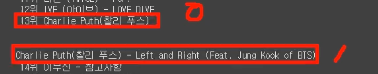

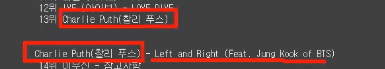

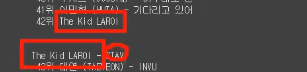

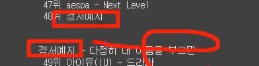

### **2-4. 멜론 차트**

In [ ]:
url = 'https://www.melon.com/chart/index.html'
request = requests.get(url)
print(request)

<Response [406]>


In [ ]:
# User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}  # header하는 이유는 홈페이지에서 그대로 가져올 수 없으니까 우회?하는 형식
url = 'https://www.melon.com/chart/index.html'
request = requests.get(url, headers=header) # headers를 포함해서 request한다.
print(request)


# f12 
# network -> 빨간불이 들어와있는지 확인한 후
# f5키 누르고
# index.htm 누르고 
# reqeust headers에서 user-agent 확인
# 

<Response [200]>


In [ ]:
soup = BeautifulSoup(request.text)

In [ ]:
titles = soup.findAll('div', {'class':'rank01'})
# print(titles)
artists = soup.findAll('span', {'class':'checkEllipsis'})
print(artists)

[<span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3110856');" title="WSG워너비 (가야G) - 페이지 이동">WSG워너비 (가야G)</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3110857');" title="WSG워너비 (4FIRE) - 페이지 이동">WSG워너비 (4FIRE)</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('2622030');" title="ITZY (있지) - 페이지 이동">ITZY (있지)</a></span>, <span class="checkEllipsis" style="display:no

In [ ]:
soup = BeautifulSoup(request.text)


In [ ]:
titles = soup.findAll('div', {'class':'rank01'})
# print(titles) # 복잡하니까 주석처리 함 
artists = soup.findAll('span', {'class':'checkEllipsis'})
print(artists)

[<span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3110856');" title="WSG워너비 (가야G) - 페이지 이동">WSG워너비 (가야G)</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3110857');" title="WSG워너비 (4FIRE) - 페이지 이동">WSG워너비 (4FIRE)</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a></span>, <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('2622030');" title="ITZY (있지) - 페이지 이동">ITZY (있지)</a></span>, <span class="checkEllipsis" style="display:no

In [ ]:
for i in range(len(titles)):
  title = titles[i].text.strip()
  artist = artists[i].text.strip()
  print('{0:3d}위 {1} - {2}'.format(i+1, artist, title))

  1위 NewJeans - Attention
  2위 WSG워너비 (가야G) - 그때 그 순간 그대로 (그그그)
  3위 WSG워너비 (4FIRE) - 보고싶었어
  4위 IVE (아이브) - LOVE DIVE
  5위 NewJeans - Hype boy
  6위 ITZY (있지) - SNEAKERS
  7위 나연 (TWICE) - POP!
  8위 (여자)아이들 - TOMBOY
  9위 싸이 (PSY) - That That (prod. & feat. SUGA of BTS)
 10위 BIG Naughty (서동현) - 정이라고 하자 (Feat. 10CM)
 11위 경서 - 나의 X에게
 12위 임영웅 - 사랑은 늘 도망가
 13위 멜로망스 - 사랑인가 봐
 14위 10CM - 그라데이션
 15위 aespa - Girls
 16위 임영웅 - 우리들의 블루스
 17위 aespa - 도깨비불 (Illusion)
 18위 볼빨간사춘기 - Love story
 19위 소녀시대 (GIRLS' GENERATION) - FOREVER 1
 20위 LE SSERAFIM (르세라핌) - FEARLESS
 21위 주호 - 내가 아니라도
 22위 임영웅 - 다시 만날 수 있을까
 23위 BE'O (비오) - LOVE me
 24위 BIGBANG (빅뱅) - 봄여름가을겨울 (Still Life)
 25위 임영웅 - 무지개
 26위 NewJeans - Cookie
 27위 김민석 (멜로망스) - 취중고백
 28위 IVE (아이브) - ELEVEN
 29위 임영웅 - 이제 나만 믿어요
 30위 선미 - 열이올라요 (Heart Burn)
 31위 임영웅 - 아버지
 32위 경서예지, 전건호 - 다정히 내 이름을 부르면
 33위 Red Velvet (레드벨벳) - Feel My Rhythm
 34위 WSG워너비 (오아시소) - Clink Clink (클링 클링)
 35위 임영웅 - A bientot
 36위 임영웅 - 손이 참 곱던 그대
 37위 이무진 - 신호등
 38위 #안녕 - 해요

### **2-4. 지니차트 200**

In [ ]:
url = 'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220627&hh=21&rtm=Y&pg='
for i in range(1, 5):
  site = '{}{}'.format(url, i)
  print(site)

https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220627&hh=21&rtm=Y&pg=1
https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220627&hh=21&rtm=Y&pg=2
https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220627&hh=21&rtm=Y&pg=3
https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220627&hh=21&rtm=Y&pg=4


In [ ]:
import time

genie = []

# User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
url = 'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220627&hh=21&rtm=Y&pg='
for i in range(1, 5):
  site = '{}{}'.format(url, i)
  request = requests.get(site, headers=header)
  time.sleep(1) 
  # for문은 빠르니까 첫 페이지 요청하자마자 바로 두번째 페이지 요청,,세번째, 네번째 페이지를 요청을 한다. 
  # 그러면 읽어오지 못한 첫 페이지에서 바로 다음페이지를 읽어올 수 있기 때문에 잠깐 멈춰주도록하기 위해 time.sleep(1) 1초를 건다.
  # time.sleep()을 사용하려면 import time이 필요하므로 맨 처음에 적어둔다.
  soup = BeautifulSoup(request.text)

  titles = soup.findAll('a', {'class':'title ellipsis'})
  # print(titles)
  artists = soup.findAll('a', {'class':'artist ellipsis'})
  # print(artists)
  for i in range(50):
    if titles[i].text.strip().split('\n')[0] == '19금': # 19금 로고를 없애기 위해서 
      title = titles[i].text.strip().split('\n')[-1].replace(' ', '')  # 끝에것을 가져오기 위해서 [-1]을 하는 것, 그리고 공백(' ')이 있으면 '' 공백을 없앰
    else:
      title = titles[i].text.strip()

    artist = artists[i].text.strip().split('\n')[0]
    genie.append((title, artist))

print(genie)
print(len(genie))

[('Attention', 'NewJeans'), ('그때 그 순간 그대로 (그그그)', 'WSG워너비 (가야G)'), ('보고싶었어', 'WSG워너비 (4FIRE)'), ('Hype boy', 'NewJeans'), ('LOVE DIVE', 'IVE (아이브)'), ('SNEAKERS', 'NewJeans'), ('TOMBOY', 'WSG워너비 (가야G)'), ('POP!', 'WSG워너비 (4FIRE)'), ('That That (Prod. & Feat. SUGA of BTS)', 'NewJeans'), ('정이라고 하자 (Feat. 10CM)', 'IVE (아이브)'), ('나의 X에게', 'ITZY (있지)'), ('사랑인가 봐', '(여자)아이들'), ('사랑은 늘 도망가', '나연 (TWICE)'), ('도깨비불 (Illusion)', '싸이 (Psy)'), ('FOREVER 1', 'BIG Naughty (서동현)'), ('Love story', '경서'), ('그라데이션', '멜로망스 (MeloMance)'), ('우리들의 블루스', '임영웅'), ('LOVE me', 'aespa'), ('Girls', "소녀시대 (GIRLS' GENERATION)"), ('내가 아니라도', '볼빨간사춘기'), ('봄여름가을겨울 (Still Life)', '10CM'), ("That's Hilarious", '임영웅'), ('Clink Clink (클링 클링)', "BE'O (비오)"), ('다정히 내 이름을 부르면', 'aespa'), ('Cookie', '주호'), ('FEARLESS', 'BIGBANG (빅뱅)'), ('다시 만날 수 있을까', 'Charlie Puth'), ('취중고백', 'WSG워너비 (오아시소)'), ('열이올라요 (Heart Burn)', '경서예지 & 전건호'), ('ELEVEN', 'NewJeans'), ('신호등', 'LE SSERAFIM (르세라핌)'), ("바보에게 바보가 (웹툰 '연애의 발견' X 이석훈)", '임영웅'),

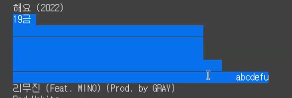

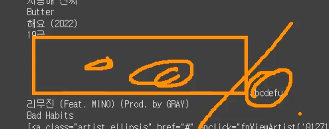

In [ ]:
for i in range(200):
  print('{0:3d}위 {1} - {2}'.format(i + 1, genie[i][1], genie[i][0]))

  1위 NewJeans - Attention
  2위 WSG워너비 (가야G) - 그때 그 순간 그대로 (그그그)
  3위 WSG워너비 (4FIRE) - 보고싶었어
  4위 NewJeans - Hype boy
  5위 IVE (아이브) - LOVE DIVE
  6위 NewJeans - SNEAKERS
  7위 WSG워너비 (가야G) - TOMBOY
  8위 WSG워너비 (4FIRE) - POP!
  9위 NewJeans - That That (Prod. & Feat. SUGA of BTS)
 10위 IVE (아이브) - 정이라고 하자 (Feat. 10CM)
 11위 ITZY (있지) - 나의 X에게
 12위 (여자)아이들 - 사랑인가 봐
 13위 나연 (TWICE) - 사랑은 늘 도망가
 14위 싸이 (Psy) - 도깨비불 (Illusion)
 15위 BIG Naughty (서동현) - FOREVER 1
 16위 경서 - Love story
 17위 멜로망스 (MeloMance) - 그라데이션
 18위 임영웅 - 우리들의 블루스
 19위 aespa - LOVE me
 20위 소녀시대 (GIRLS' GENERATION) - Girls
 21위 볼빨간사춘기 - 내가 아니라도
 22위 10CM - 봄여름가을겨울 (Still Life)
 23위 임영웅 - That's Hilarious
 24위 BE'O (비오) - Clink Clink (클링 클링)
 25위 aespa - 다정히 내 이름을 부르면
 26위 주호 - Cookie
 27위 BIGBANG (빅뱅) - FEARLESS
 28위 Charlie Puth - 다시 만날 수 있을까
 29위 WSG워너비 (오아시소) - 취중고백
 30위 경서예지 & 전건호 - 열이올라요 (Heart Burn)
 31위 NewJeans - ELEVEN
 32위 LE SSERAFIM (르세라핌) - 신호등
 33위 임영웅 - 바보에게 바보가 (웹툰 '연애의 발견' X 이석훈)
 34위 김민석 (멜로망스) - 이제 나만 믿어요
 35위 